<a href="https://colab.research.google.com/github/obengdouglas/DSI-2022/blob/main/DSI_hexagon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-DSI Assignment - 2022**

**Question 1: Unexpected Plots **

**Notes**

Write a python function that will plot the points that come from the following procedure: 

1. Create a regular hexagon
2. Pick a random point, P, inside the hexagon. 
3. Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
4. Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 
5. Make a scatter plot of all your 10,000 random points. What emerges? 

The goal of this exercise is to ensure that you have enough basic skills and familiarity with python to succeed.

[url to document](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit)

In [72]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns
import sklearn
import scipy
import torch
import turtle
import math
from math import sqrt
import random
import time


Coordinates of hexagon are [(1, 0), (0.5, 0.8660254037844386), (-0.5, 0.8660254037844386), (-1, 0), (-0.5, -0.8660254037844386), (0.5, -0.8660254037844386), (1, 0)]
The time of execution of above program is : 288.47857451438904


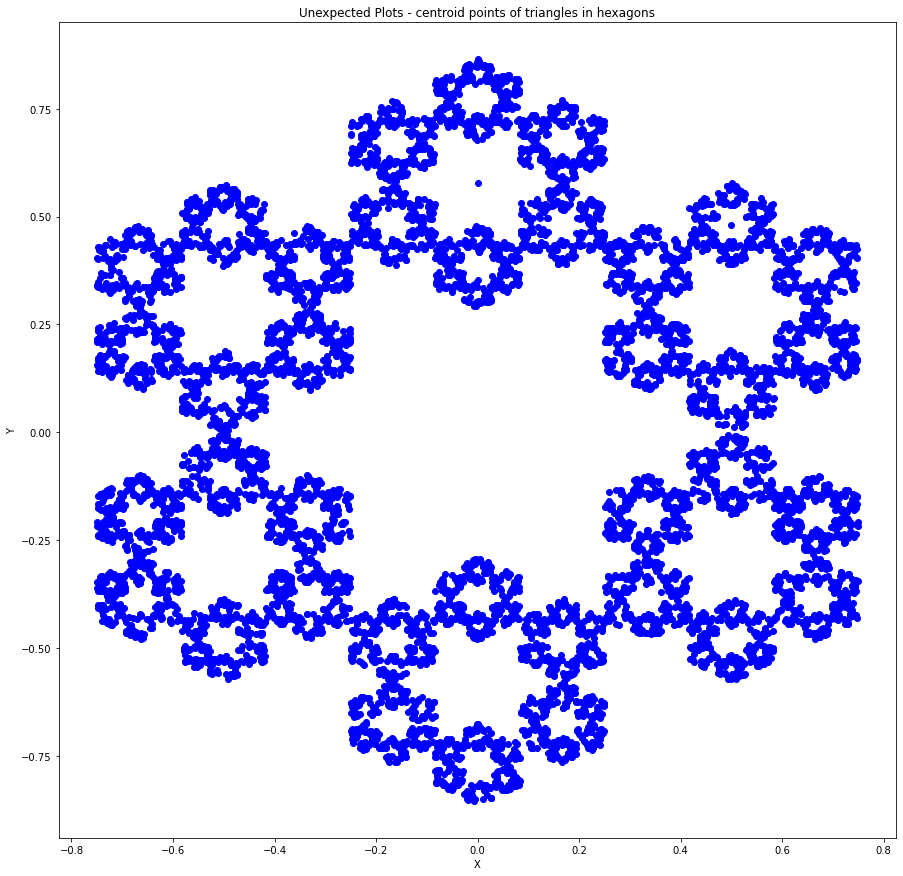

In [107]:
# 1. Create Regular hexagon 
start = time.time()
# Put coordinates of a regular hexagon in a dictionary. A - F are the coordinates of a regular polygon with length of 1 and center 0,0. (https://qr.ae/pG6IHm). 

coordinates = {'A':(1,0), 'B':(0.5,0.5*sqrt(3)), 'C':(-0.5,0.5*sqrt(3)), 'D':(-1,0), 'E':(-0.5,-0.5*sqrt(3)), 'F':(0.5,-0.5*sqrt(3))} 
hexagon=[coordinates[x] for x in coordinates]
hexagon.append(hexagon[0]) # Append coordinates of hexagon. Argument refers to index of last/ending coordinates (ie. coordinates A. )
xh, yh = zip(*hexagon) # Create lists of x and y values for hexagon

centroid = (0,0) # Define centroid with dummy coordinates. 
print('Coordinates of hexagon are', hexagon)

#2-4. Put creation of triangles and centroids in a loop
# The 3 coordinates used for a triangle are: 1. centroid . 2. random coordinate selected from A -F. 3. coordinate adjacent to randomly selected coordinate (in forward direction)

for a in range(10000):
  adjacent = ['A', 'B', 'C', 'D', 'E', 'F', 'A'] #Ending at A ensures F has a forward adjacent coordinate
  n_pairs = 1

  for _ in range(n_pairs):
    i = random.randrange(len(adjacent)-1)
    randpoints = [adjacent[i], adjacent[i+1]]
    triangle=[coordinates[x] for x in randpoints]
    triangle.insert(0, centroid)
    
    trianglecopy=triangle.copy()

    triangle.append(triangle[0]) #close triangle
    xt, yt = zip(*triangle)

    xx = []
    for x in trianglecopy:
      xx.append(x[0])
    x1, x2, x3 = xx # where x1, x2, x3 refer to x coordinates of triangle

    yy = []
    for y in trianglecopy:
      yy.append(y[1])
    y1, y2, y3 = yy # where y1, y2, y3 refer to y coordinates of triangle


    xc = ((x1 + x2 + x3) / 3)
    yc = ((y1 + y2 + y3) / 3)
    #print('centroid',(a),':', centroid) #uncomment to print coordinates of centroids
    #print('triangle coordinates are',(a),':', trianglecopy) #uncomment to print coordinates of triangles. First x,y coordinates refers to centroid.
    centroid = (xc, yc)
    
    #Uncomment below to show plot of triangles
    # plot1=plt.figure(1)
    # plt.ion()
    # plt.rcParams['figure.figsize'] = [15, 15]
    # plt.title("Unexpected Plots - triangles in hexagons")
    # plt.xlabel("X")
    # plt.ylabel("Y")
    # plt.plot(xt, yt, color='green')

    #5. Plot centroid points NB: Initial random point not printed
    plot1=plt.figure(2)
    plt.ion()
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.title("Unexpected Plots - centroid points of triangles in hexagons")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(xc, yc, color='blue')

#plt.plot(xh, yh, color='red') # uncomment to show haxagon around centroid points

end = time.time()
print("The time of execution of above program is :", end-start)

# Consider the following changes/improvements
# 1. Generate hexagon without need for coordinates. Can process be done using turtle
# 2. Make selection of first random internal point (centroid) truelly automatic/random. Current method is random but manual
# 3. Improve runtime
# 4. Include initial random point in plot without omitting last centroid point